<a href="https://colab.research.google.com/github/harithaselvakumaran/Customer_Churn_Prediction/blob/main/Bank_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [110]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [112]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


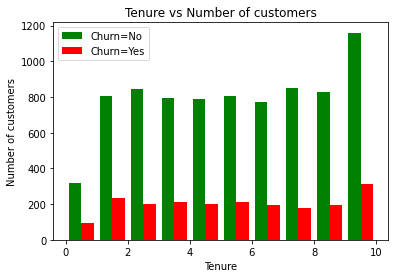

In [114]:
tenure_churn_no = df[df['Exited']==0]['Tenure']
tenure_churn_yes = df[df['Exited']==1]['Tenure']

plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Tenure vs Number of customers')

plt.hist([tenure_churn_no, tenure_churn_yes], color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

Churn rate is low when tenure is high

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


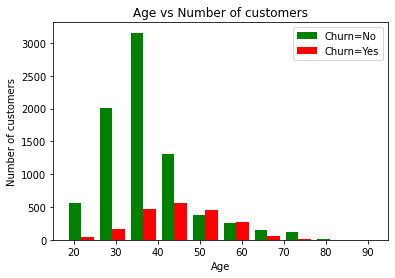

In [115]:
age_churn_no = df[df['Exited']==0]['Age']
age_churn_yes = df[df['Exited']==1]['Age']

plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('Age vs Number of customers')

plt.hist([age_churn_no, age_churn_yes], color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

Churn Rate is very low between ages 30-50 as compared to the number of customers

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


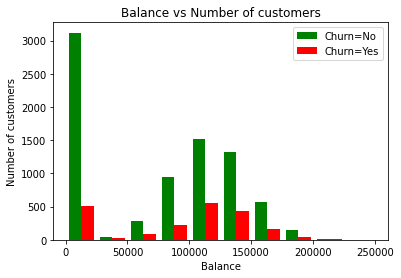

In [117]:
balance_churn_no = df[df['Exited']==0]['Balance']
balance_churn_yes = df[df['Exited']==1]['Balance']

plt.xlabel('Balance')
plt.ylabel('Number of customers')
plt.title('Balance vs Number of customers')

plt.hist([balance_churn_no, balance_churn_yes], color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

There seems to be outliers near to 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


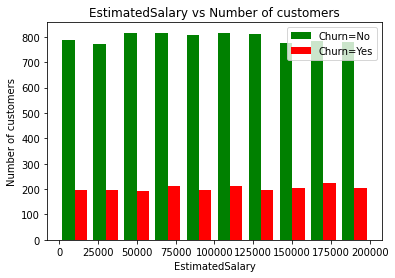

In [118]:
salary_churn_no = df[df['Exited']==0]['EstimatedSalary']
salary_churn_yes = df[df['Exited']==1]['EstimatedSalary']

plt.xlabel('EstimatedSalary')
plt.ylabel('Number of customers')
plt.title('EstimatedSalary vs Number of customers')

plt.hist([salary_churn_no, salary_churn_yes], color=['green','red'], label=['Churn=No','Churn=Yes'])
plt.legend()

There doesn't seem to be impact of Estimated Salary on Churn

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
df = pd.get_dummies(df, columns=['Geography','Gender'])

In [21]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
df[cols_to_scale] = mx.fit_transform(df[cols_to_scale])

In [22]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(5), int64(4), uint8(5)
memory usage: 752.1 KB


In [26]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.282727,0.501280,0.304848,1.530200,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,0.193307,0.141727,0.289217,0.248696,0.581654,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.189189,0.300000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.604000,0.256757,0.500000,0.387402,1.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.736000,0.351351,0.700000,0.508749,2.000000,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
X = df.drop('Exited', axis=1)
Y = df['Exited']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [29]:
import tensorflow as tf
from tensorflow import keras

In [31]:
X_train.shape

(8000, 13)

In [34]:
model = keras.Sequential([
                          keras.layers.Dense(20, input_dim=13, activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5026 - accuracy: 0.7919
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.7994
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8045
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8121
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8154
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8189
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8275
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8363
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8420
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3693 - accura

In [49]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8510


[0.34938257932662964, 0.8510000109672546]

In [57]:
y_pred = model.predict(X_test).reshape(-1)

In [58]:
y_pred = np.round(y_pred)

In [59]:
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [61]:
Y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.69      0.48      0.56       405

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(33.0, 0.5, 'Truth')

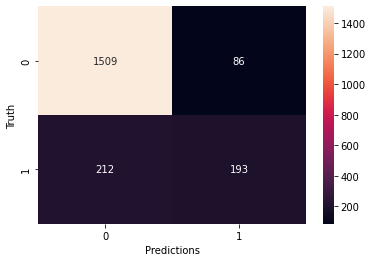

In [64]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

Accurracy of 1 is less because of imbalanced dataset

In [73]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [74]:
count_of_majority,count_of_minority = df['Exited'].value_counts()

In [90]:
df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]

In [91]:
df_class_1_over = df_class_1.sample(count_of_majority, replace=True)

In [92]:
df_class_1_over.shape

(7963, 14)

In [93]:
df_test = pd.concat([df_class_0,df_class_1_over], axis=0)

In [94]:
df_test.shape

(15926, 14)

In [96]:
X = df_test.drop('Exited',axis=1)
Y = df_test['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=5, stratify=Y)

In [97]:
model = keras.Sequential([
                          keras.layers.Dense(20, input_dim=13, activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6662 - accuracy: 0.6216
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6149 - accuracy: 0.6639
Epoch 3/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5804 - accuracy: 0.6974
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7171
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7363
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5181 - accuracy: 0.7462
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5055 - accuracy: 0.7516
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.7560
Epoch 9/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4897 - accuracy: 0.7604
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4850 - accura

In [98]:
model.evaluate(X_test, Y_test)

100/100 [==============================] - 0s 995us/step - loss: 0.4310 - accuracy: 0.8010


[0.4310382902622223, 0.8010044097900391]

In [101]:
Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred)

In [102]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1593
           1       0.81      0.79      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



Accuracy for class 1 has gone from 56% to 80%

Text(33.0, 0.5, 'Truth')

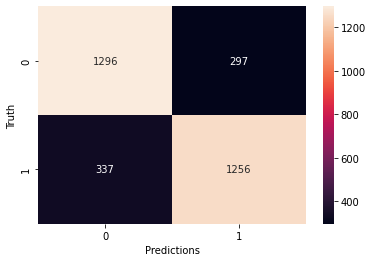

In [105]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')